In [67]:
import nltk

In [68]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
from nltk.corpus import stopwords

In [70]:
messages = [line.rstrip() for line in open("SMSSpamCollection")]

In [71]:
len(messages)

5574

In [72]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [73]:
for mess_num,message in enumerate(messages[:10]):
  print(mess_num,message)
  print("")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1 ham	Ok lar... Joking wif u oni...

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

3 ham	U dun say so early hor... U c already then say...

4 ham	Nah I don't think he goes to usf, he lives around here though

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

6 ham	Even my brother is not like to speak with me. They treat me like aids patent.

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. V

In [74]:
import pandas as pd

In [75]:
messages = pd.read_csv("SMSSpamCollection",sep = "\t",names = ['labels','message'])

In [76]:
messages.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [77]:
messages.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [78]:
messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [79]:
messages['length'] = messages['message'].apply(len)

In [80]:
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [81]:
import matplotlib.pyplot as plt

<Axes: ylabel='Frequency'>

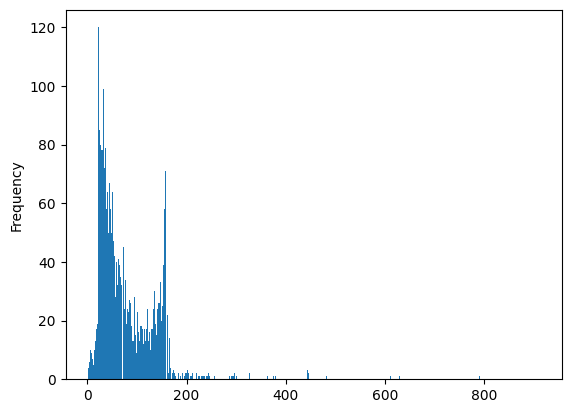

In [82]:
messages["length"].plot.hist(bins=1000)

In [83]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [84]:
messages[messages["length"] == 910]['message']

1085    For me the love should start with attraction.i...
Name: message, dtype: object

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

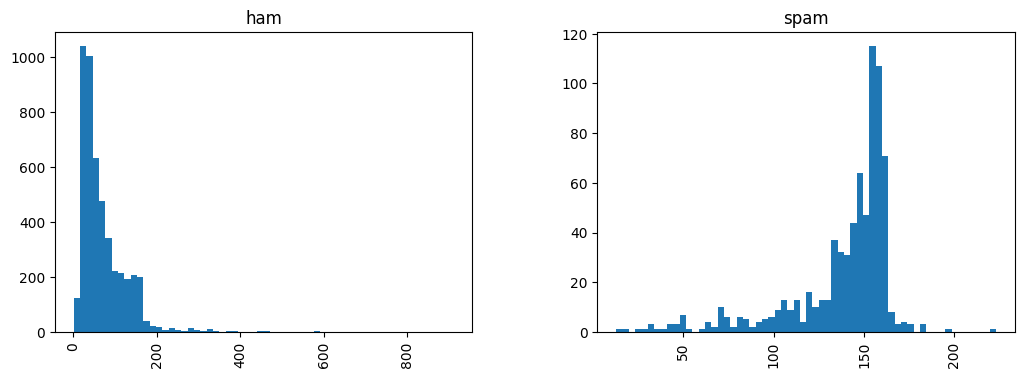

In [85]:
messages.hist(column= 'length',by = 'labels',bins = 60,figsize = (12,4))

In [86]:
import string

In [87]:
mess = "sample message! Notice : it is punctuatltion"

In [88]:
nopunc = [c for c in mess if c not in string.punctuation]

In [89]:
nopunc = "".join(nopunc)

In [90]:
nopunc

'sample message Notice  it is punctuatltion'

In [91]:
nopunc = nopunc.split()

In [92]:
clean_mess = [word for word in nopunc if word.lower() not in stopwords.words("english")]

In [93]:
clean_mess

['sample', 'message', 'Notice', 'punctuatltion']

In [94]:
def textPreprocess(mess):
  """
  1. remove punc
  2. remove stop words
  3. return list of clean text words
  """
  nopunc = [char for char in mess if char not in string.punctuation]
  nopunc = "".join(nopunc)
  nopunc = [word for word in nopunc.split() if word.lower() not in stopwords.words("english")]

  return nopunc

In [95]:
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [96]:
messages['message'].head(5).apply(textPreprocess)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [97]:
from sklearn.feature_extraction.text import CountVectorizer

In [98]:
bowTransformer = CountVectorizer(analyzer=textPreprocess).fit(messages["message"])

In [99]:
len(bowTransformer.vocabulary_)

11425

In [100]:
mess4 = messages['message'][3]

In [101]:
mess4

'U dun say so early hor... U c already then say...'

In [102]:
bow4 = bowTransformer.transform([mess4])

In [103]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [104]:
print(bow4.shape)

(1, 11425)


In [105]:
bowTransformer.get_feature_names_out()[4068]

'U'

In [106]:
bowTransformer.get_feature_names_out()[9554]

'say'

In [107]:
messages_bow = bowTransformer.transform(messages['message'])

In [108]:
print("Shape of sparse matrix : ",messages_bow.shape)

Shape of sparse matrix :  (5572, 11425)


In [109]:
messages_bow.nnz

50548

In [111]:
from sklearn.feature_extraction.text import TfidfTransformer

In [122]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [123]:
tf = tfidf_transformer.transform(bow4)

In [124]:
print(tf)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [126]:
message_tfidf = tfidf_transformer.transform(messages_bow)

In [127]:
from sklearn.naive_bayes import MultinomialNB

In [128]:
spam_detect_model = MultinomialNB().fit(message_tfidf,messages['labels'])

In [129]:
spam_detect_model.predict(tf)[0]

'ham'

In [130]:
messages['labels'][3]

'ham'

In [131]:
all_pred = spam_detect_model.predict(message_tfidf)

In [132]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['labels'],test_size=0.3,random_state=42)

In [135]:
msg_train

708     Quite late lar... Ard 12 anyway i wun b drivin...
4338                        on a Tuesday night r u 4 real
5029    Go chase after her and run her over while she'...
4921     G says you never answer your texts, confirm/deny
2592         Still work going on:)it is very small house.
                              ...                        
3772    Hi, wlcome back, did wonder if you got eaten b...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860               Did he just say somebody is named tampa
Name: message, Length: 3900, dtype: object

In [136]:
from sklearn.pipeline import Pipeline

In [137]:
pipeline = Pipeline(
    [
        ("bow",CountVectorizer(analyzer=textPreprocess)),
        ("tfidf",TfidfTransformer()),
        ("Classifier",MultinomialNB())
    ]
)

In [138]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function textPreprocess at 0x7fa9733d4430>)),
                ('tfidf', TfidfTransformer()),
                ('Classifier', MultinomialNB())])

In [140]:
prediction = pipeline.predict(msg_test)

In [141]:
from sklearn.metrics import classification_report

In [142]:
print(classification_report(label_test,prediction))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       1.00      0.73      0.85       224

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.96      0.96      1672

